In [30]:
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

file_path = '/Users/gali/Desktop/dsmp-2024-group15/Python files/SARIMAX april/SARIMAX_asks.csv'
ask = pd.read_csv(file_path)
print(ask)




     Type  adjusted_time_hours       Price
0     ask                  0.0  259.058784
1     ask                  1.0  257.922733
2     ask                  2.0  266.827586
3     ask                  3.0  280.176471
4     ask                  4.0  283.926437
...   ...                  ...         ...
1058  ask               1058.0  115.226240
1059  ask               1059.0  115.324496
1060  ask               1060.0  113.814666
1061  ask               1061.0  114.353052
1062  ask               1062.0  114.180948

[1063 rows x 3 columns]


Testing original data:
ADF Statistic: -0.923053
p-value: 0.780286
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568

Determining the differencing order needed for stationarity:
1       -1.136051
2        8.904853
3       13.348884
4        3.749966
5       -5.434691
          ...    
1058     0.001600
1059     0.098256
1060    -1.509830
1061     0.538386
1062    -0.172104
Name: Price, Length: 1062, dtype: float64

Differencing Order: 1
ADF Statistic: -9.244350
p-value: 0.000000
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568
Series is stationary


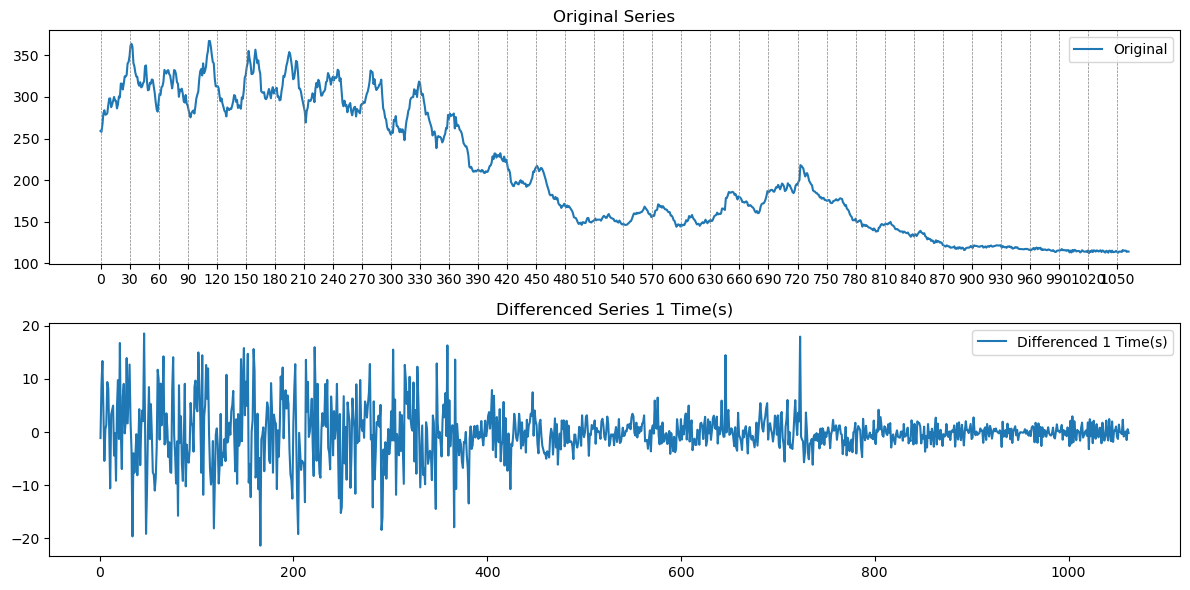

In [23]:
def adf_test(time_series):
    """Perform ADF test and return results"""
    result = adfuller(time_series, autolag='AIC')  # ADF test
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
    return result

def determine_diff_order(timeseries, max_diff=5):
    """Apply iterative differencing and ADF test to determine the order of differencing"""
    p_value = 1
    diff_order = 1
    while p_value > 0.05 and diff_order <= max_diff:
        diff_series = timeseries.diff(periods=diff_order).dropna()
        print(diff_series)
        print(f"\nDifferencing Order: {diff_order}")
        result = adf_test(diff_series)
        p_value = result[1]
        if p_value < 0.05:
            print("Series is stationary")
            break
        diff_order += 1
    return diff_order

# Check original data's stationarity
print("Testing original data:")
adf_test(ask.Price)

# Determine the order of differencing needed
print("\nDetermining the differencing order needed for stationarity:")
order = determine_diff_order(ask.Price)

# Plot original and differenced data
plt.figure(figsize=(12, 6))
plt.subplot(211)
plt.plot(ask.Price, label='Original')
plt.title('Original Series')
data_points = len(ask.Price)
plt.xticks(range(0,data_points,30))
for i in range(0,data_points,30):
    plt.axvline(x=i, color='gray', linestyle='--', linewidth=0.5)
plt.legend()
plt.savefig('original series.png')

plt.subplot(212)
plt.plot(ask.Price.diff(periods=order).dropna(), label=f'Differenced {order} Time(s)')
plt.title(f'Differenced Series {order} Time(s)')
plt.legend()

plt.tight_layout()
plt.show()



In [ ]:

values = [[arma_mod20.aic,arma_mod20.bic,arma_mod20.hqic],
          [arma_mod30.aic,arma_mod30.bic,arma_mod30.hqic],
          [arma_mod40.aic,arma_mod40.bic,arma_mod40.hqic]]

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.06859D+00    |proj g|=  9.81430D-02

At iterate    5    f=  2.93781D+00    |proj g|=  4.55403D-02

At iterate   10    f=  2.93462D+00    |proj g|=  3.97662D-03

At iterate   15    f=  2.93422D+00    |proj g|=  1.45379D-03

At iterate   20    f=  2.93418D+00    |proj g|=  7.30997D-05

At iterate   25    f=  2.93418D+00    |proj g|=  2.29194D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     25     31      1     0     0   

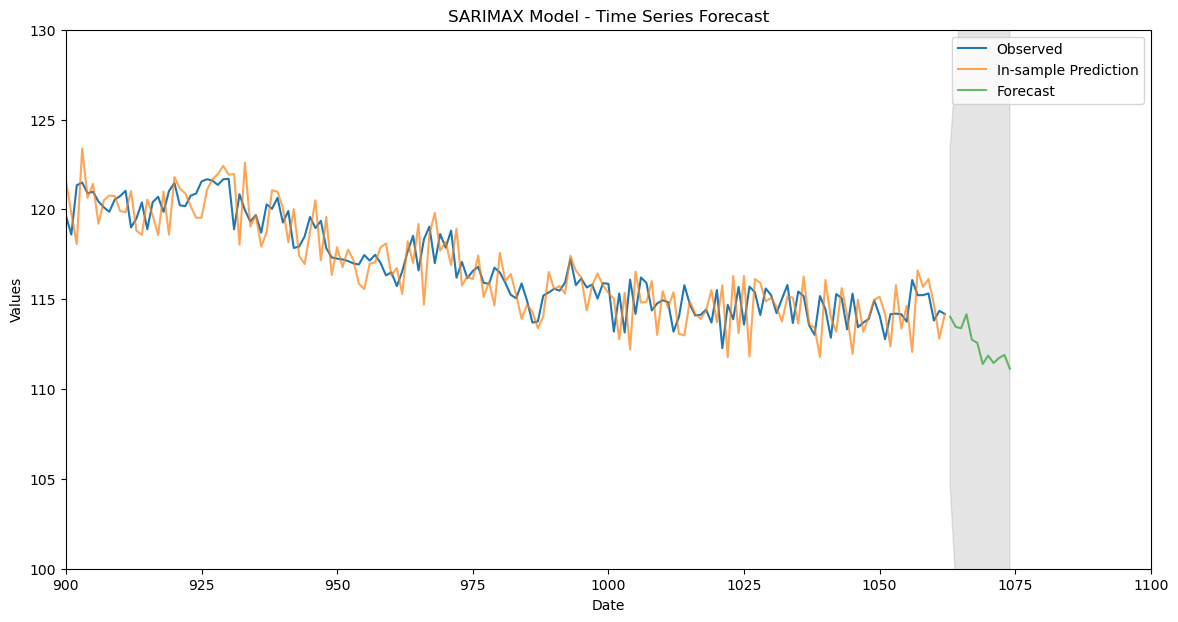

                                     SARIMAX Results                                      
Dep. Variable:                              Price   No. Observations:                 1063
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 30)   Log Likelihood               -3119.038
Date:                            Mon, 22 Apr 2024   AIC                           6248.076
Time:                                    12:55:29   BIC                           6272.772
Sample:                                         0   HQIC                          6257.448
                                           - 1063                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5515      0.105      5.257      0.000       0.346       0.757
ma.L1         -0.4078      0.114   

In [32]:
# Fit a SARIMAX model
# (1, 0, 1) are the AR, Differencing, and MA orders for the non-seasonal component
# (1, 1, 1, 12) are the seasonal AR, Differencing, and MA orders and seasonal period
model = SARIMAX(ask.Price, order=(1, 1, 1), seasonal_order=(1, 1, 1, 30))
results = model.fit()

# Make in-sample prediction and forecast
prediction = results.get_prediction(start=900, dynamic=False)
predicted_mean = prediction.predicted_mean
forecast = results.get_forecast(steps=12)
forecast_mean = forecast.predicted_mean

# Plot the results
plt.figure(figsize=(14, 7))
ask.Price.plot(label='Observed')
predicted_mean.plot(label='In-sample Prediction', alpha=0.7)
forecast_mean.plot(label='Forecast', alpha=0.7)
plt.fill_between(forecast_mean.index,
                 forecast.conf_int().iloc[:, 0],
                 forecast.conf_int().iloc[:, 1], color='k', alpha=0.1)
plt.title('SARIMAX Model - Time Series Forecast')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
x_min, x_max = 900, 1100  
y_min, y_max = 100, 130   


plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)


plt.show()



# ask.Price[900:].plot(label='Observed')
# predicted_mean[900:].plot(label='In-sample Prediction', alpha=0.7)
# forecast_mean[900:].plot(label='Forecast', alpha=0.7)

# plt.fill_between(forecast_mean.index[900:],
#                  forecast.conf_int().iloc[900:, 0],
#                  forecast.conf_int().iloc[900:, 1], color='k', alpha=0.1)

# plt.xlim(900, forecast_mean.index[-1])  # 限制x轴的显示范围从900开始
# plt.ylim(100, 130)  # 设置y轴的上下界

# plt.title('SARIMAX Model - Time Series Forecast')
# plt.xlabel('Date')
# plt.ylabel('Values')
# plt.legend()
# plt.show()

# Output the summary of the model's performance
print(results.summary())


In [ ]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(ask, test_size=0.2, shuffle=False)

sarimax_model2 = SARIMAX(train_data, order=(2, 1, 1), seasonal_order=(1, 1, 1, 12))
sarimax_result2 = sarimax_model2.fit(disp=False)

predictions2 = sarimax_result2.get_forecast(steps=len(test_data)).predicted_mean

rmse = np.sqrt(mean_squared_error(test_data, predictions2))

print(f'Test RMSE: {rmse:.2f}')

plt.figure(figsize=(10, 5))
plt.plot(train_data.index, train_data, label='Training Data')
plt.plot(test_data.index, test_data, label='Test Data', color='orange')
plt.plot(test_data.index, predictions2, label='Predictions', color='green')
plt.title('Test Set and SARIMAX Predictions')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.show()